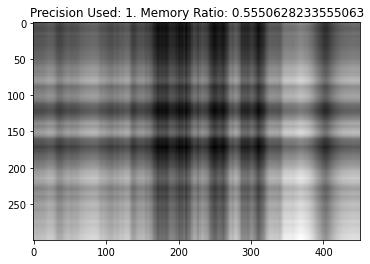

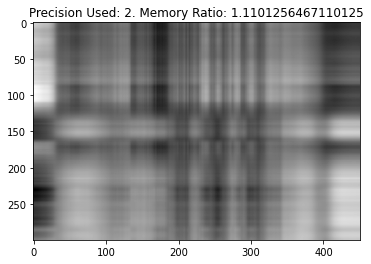

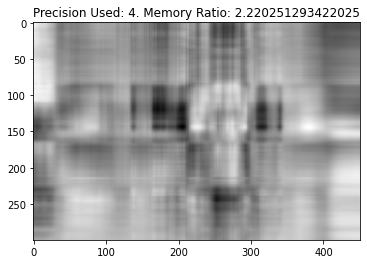

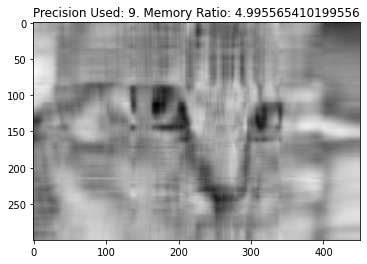

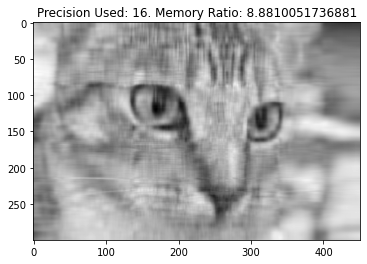

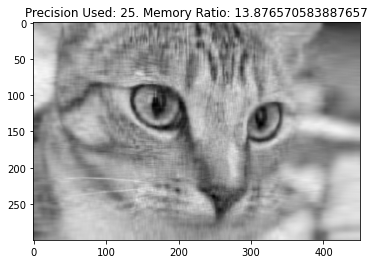

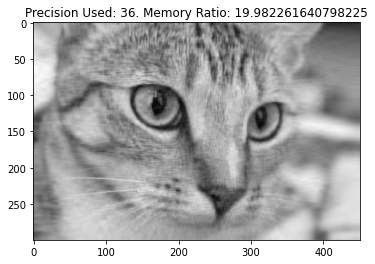

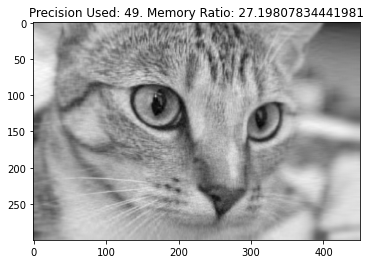

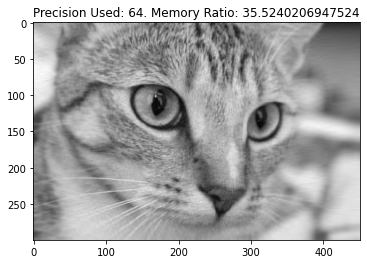

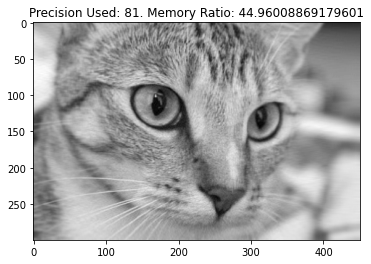

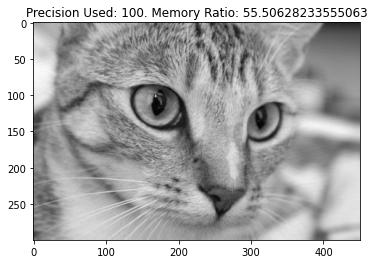

In [ ]:
from numpy.linalg import svd
import numpy as np
from skimage import data, img_as_ubyte
from skimage.color import rgb2gray
%matplotlib inline 
from matplotlib import pyplot as plt




ks = [1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]


def compress_svd(image,k):

    U, E, V = svd(image,full_matrices=False)
    
    U_k = U[:, :k] #First <k> columns of U
    E_k = np.diag(E[:k]) #First <k> elements of the diagonal of E
    V_k = V[:k, :] #First <k> rows of V

    E_dot_V = np.dot(E_k, V_k) # E * V 

    new_matrix = np.dot(U_k, E_dot_V)
   
    return new_matrix



orig_image = rgb2gray(img_as_ubyte(data.chelsea()))
original_shape = orig_image.shape
original_num = original_shape[0]*original_shape[1]

for k in ks:
  new_matrix = compress_svd(orig_image, k)
  new_num = k * (original_shape[0] + original_shape[1])
  ratio = 100.0 * new_num / original_num
  
  plt.imshow(new_matrix, cmap="gray")
  plt.title(f"Precision Used: {k}. Memory Ratio: {ratio}")
  plt.show()


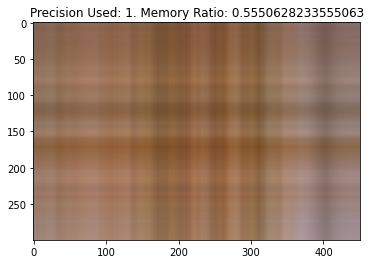

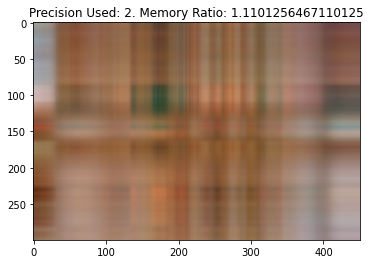

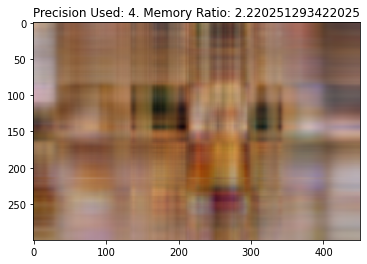

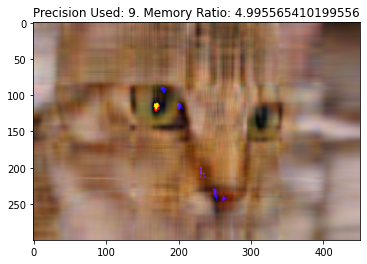

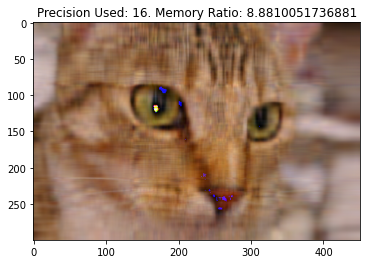

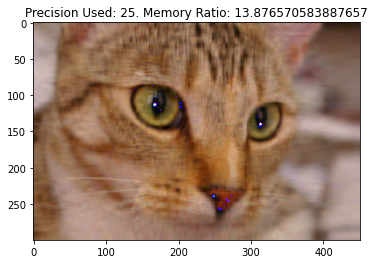

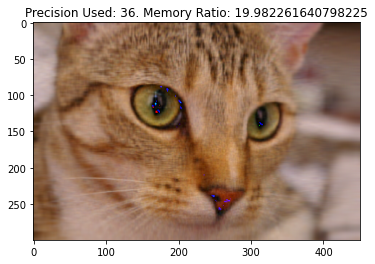

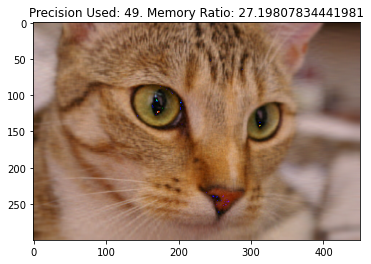

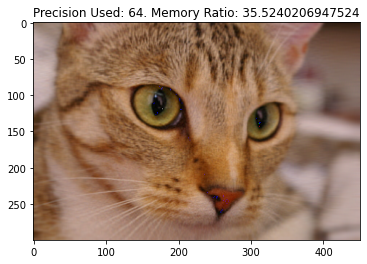

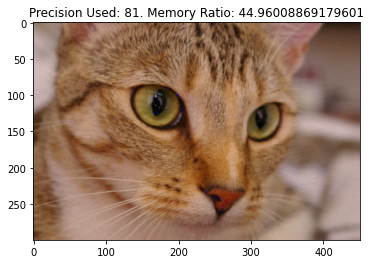

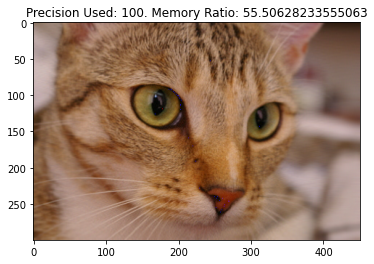

In [ ]:
orig_image = img_as_ubyte(data.chelsea())
original_shape = orig_image.shape
original_num = original_shape[0] * original_shape[1] * original_shape[2]

for k in ks:
  new_matrix_layers = []
  for i in range(3):
    new_matrix_layers.append(compress_svd(orig_image[:, :, i], k))
  
  new_matrix = np.zeros(original_shape)
  for i in range(3):
    new_matrix[:, :, i] = new_matrix_layers[i]
  
  new_num = k * (original_shape[0] + original_shape[1])
  ratio = 300.0 * new_num / original_num
 
  plt.imshow(new_matrix.astype('uint8'), cmap="gist_rainbow")
  plt.title(f"Precision Used: {k}. Memory Ratio: {ratio}")
  plt.show()